In [96]:
# Loading the imported libraries for training the data
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import *
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Loading the imported modules to convert image to array
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import glob

In [84]:
from google.colab.patches import cv2_imshow

In [85]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [87]:
# Changing the directory
import os
os.chdir('/content/drive/MyDrive/Project/FoodData')

In [88]:
# testing the image with cv2 library
img = cv2.imread("Banana/01.jpg")

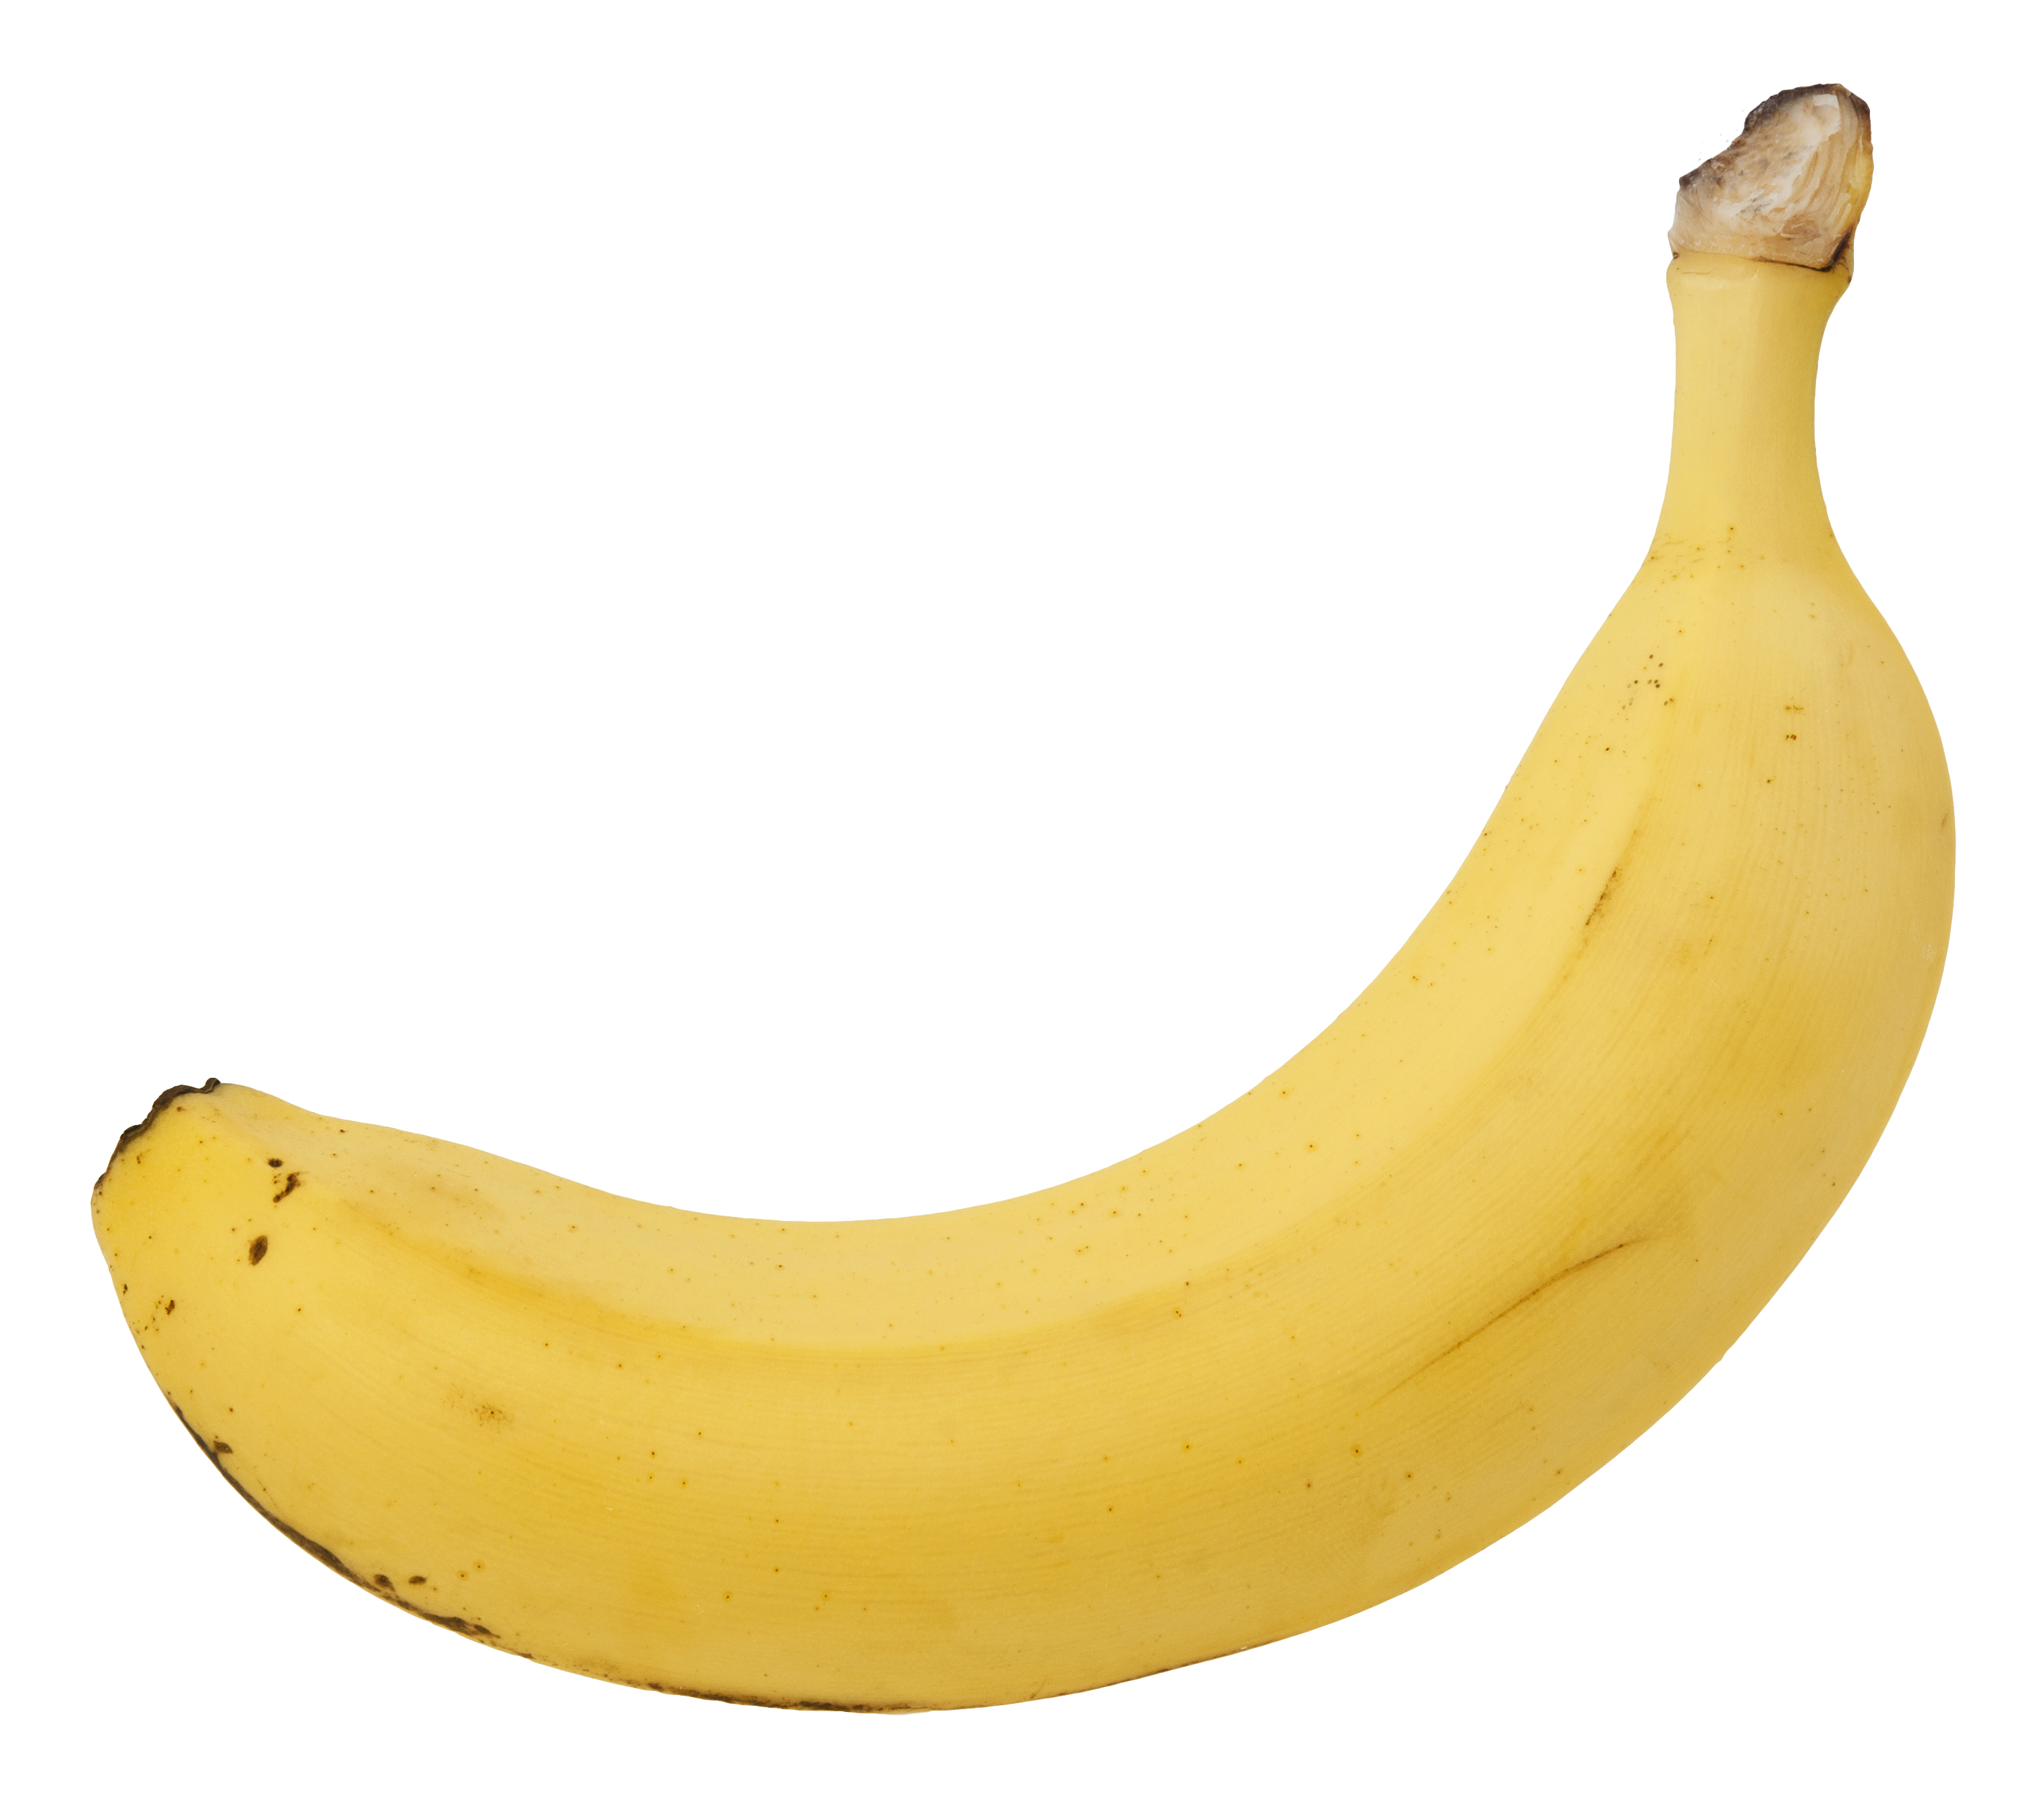

In [89]:
# Plotting the image using cv2 module
cv2_imshow(img)

In [90]:
# resizing the image
IMG_SIZE = 120
i = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

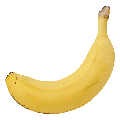

In [91]:
cv2_imshow(i)

In [92]:
# Defining the characters the key of the category dictionary is the folder name, and value is an integer
category = {
    'Apple': 0,
    'Banana': 1,
    'Cherry': 2,
    'Lemon': 3,
    'Pineapple': 4,
    'Tomato': 5
}

In [93]:
# Folders are present in google drive
IMG_SIZE = 120
train_data = []
test_data = []
# Selecting jpg files from every folder
for c in category:
    folder = "/content/drive/MyDrive/Project/FoodData/{}".format(c)
    print(folder)
    list = os.listdir(folder) # dir is the directory path 
    number_files = len(list)
    print(number_files)
    count = 0 
    # Splitting 320 images from each category for training the data and 80 images for testing the data.
    for img in glob.glob("{}/*.jpg".format(folder)):
      img = cv2.imread(img)
      img_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
      if count < 320:
          #print("train")
          train_data.append([img_array, category[c]])
          count += 1
      elif count >= 320 and count < 400:
          #print("test")
          test_data.append([img_array, category[c]])
          count += 1
      else:
          break

/content/drive/MyDrive/Project/FoodData/Apple
401
/content/drive/MyDrive/Project/FoodData/Banana
402
/content/drive/MyDrive/Project/FoodData/Cherry
401
/content/drive/MyDrive/Project/FoodData/Lemon
401
/content/drive/MyDrive/Project/FoodData/Pineapple
401
/content/drive/MyDrive/Project/FoodData/Tomato
401


In [94]:
# finding the length of train_data
len(train_data)

1920

In [95]:
# finding the length of test_data
len(test_data)

480

In [100]:
# Create the pandas DataFrame train
df = pd.DataFrame(train_data, columns = ['image', 'category'])
  
# print dataframe.
df.to_csv("/content/drive/MyDrive/Project/train_data.csv")

In [99]:
# Create the pandas DataFrame test
df = pd.DataFrame(test_data, columns = ['image', 'category'])
  
# print dataframe.
df.to_csv("/content/drive/MyDrive/Project/test_data.csv")

In [101]:
# random shuffling of train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [102]:
# Splitting the data into X_train, y_train, X_test, y_test
X_train = []
y_train = []
X_test = []
y_test = []
# In train_data and test_data first index is an image array and second index is a category that the image belongs to
for im in train_data:
    X_train.append(im[0])
    y_train.append(im[1])
for im in test_data:
    X_test.append(im[0])
    y_test.append(im[1])

In [103]:
# Convert the train and test data into numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [104]:
# Printing the shape of train and test data. There are 4650 samples for train data and 1550 samples for test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1920, 120, 120, 3)
(1920,)
(480, 120, 120, 3)
(480,)


In [105]:
X_train[3]

array([[[117, 126, 129],
        [ 93, 100, 103],
        [ 78,  83,  84],
        ...,
        [ 45,  66,  98],
        [ 43,  64,  96],
        [ 44,  65,  97]],

       [[117, 124, 127],
        [ 94, 102, 103],
        [ 80,  85,  86],
        ...,
        [ 48,  69, 101],
        [ 44,  65,  97],
        [ 43,  64,  96]],

       [[121, 127, 130],
        [105, 113, 113],
        [ 91,  96,  97],
        ...,
        [ 49,  70, 102],
        [ 44,  65,  97],
        [ 42,  63,  95]],

       ...,

       [[ 73, 183, 160],
        [ 67, 166, 144],
        [104, 198, 177],
        ...,
        [229, 229, 228],
        [236, 236, 236],
        [236, 235, 235]],

       [[187, 242, 233],
        [177, 226, 218],
        [217, 253, 248],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[222, 255, 251],
        [226, 253, 252],
        [231, 252, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [106]:
#converting the data type from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [107]:
X_train[3]

array([[[117., 126., 129.],
        [ 93., 100., 103.],
        [ 78.,  83.,  84.],
        ...,
        [ 45.,  66.,  98.],
        [ 43.,  64.,  96.],
        [ 44.,  65.,  97.]],

       [[117., 124., 127.],
        [ 94., 102., 103.],
        [ 80.,  85.,  86.],
        ...,
        [ 48.,  69., 101.],
        [ 44.,  65.,  97.],
        [ 43.,  64.,  96.]],

       [[121., 127., 130.],
        [105., 113., 113.],
        [ 91.,  96.,  97.],
        ...,
        [ 49.,  70., 102.],
        [ 44.,  65.,  97.],
        [ 42.,  63.,  95.]],

       ...,

       [[ 73., 183., 160.],
        [ 67., 166., 144.],
        [104., 198., 177.],
        ...,
        [229., 229., 228.],
        [236., 236., 236.],
        [236., 235., 235.]],

       [[187., 242., 233.],
        [177., 226., 218.],
        [217., 253., 248.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.]],

       [[222., 255., 251.],
        [226., 253., 252.],
        [231., 2

In [108]:
# Reshaping the y_train data
y_train = np.array(y_train).reshape(len(y_train),1)
y_train

array([[4],
       [0],
       [1],
       ...,
       [5],
       [5],
       [2]])

In [109]:
# Reshaping the y_test data
y_test = np.array(y_test).reshape(len(y_test),1)
y_test

array([[2],
       [5],
       [1],
       [2],
       [0],
       [0],
       [0],
       [5],
       [3],
       [3],
       [5],
       [5],
       [2],
       [2],
       [2],
       [4],
       [3],
       [0],
       [3],
       [2],
       [5],
       [0],
       [2],
       [4],
       [5],
       [4],
       [0],
       [1],
       [5],
       [2],
       [4],
       [1],
       [2],
       [1],
       [5],
       [3],
       [2],
       [1],
       [3],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [3],
       [4],
       [5],
       [3],
       [4],
       [4],
       [2],
       [0],
       [4],
       [5],
       [2],
       [0],
       [1],
       [3],
       [2],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [1],
       [5],
       [5],
       [2],
       [4],
       [2],
       [2],
       [3],
       [4],
       [4],
       [5],
       [2],
       [4],
    

In [110]:
# For y_train and y_test data we are converting integers to binary class matrix
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]
num_classes

6

In [111]:
y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [112]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [113]:
# Scaling the X_train values between 0 and 1
X_train = X_train.reshape((len(X_train), 120, 120, 3))
X_train /= 255

In [114]:
# Scaling the X_test values between 0 and 1
X_test = X_test.reshape((len(X_test), 120, 120, 3))
X_test /= 255

In [115]:
# Building the model using keras sequential method by adding the convolution layers, maxpooling, and dense layers
model=Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 120,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [116]:
# Defining the epochs and learing rate for the model while compiling
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [117]:
# Sumamry of the model build
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)        

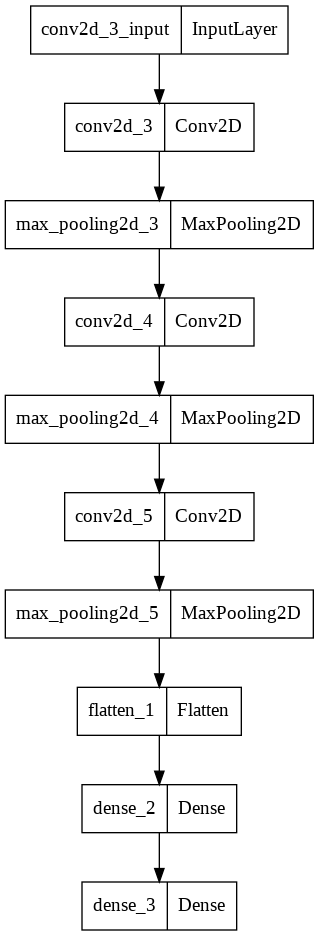

In [118]:
# Flow diagram of the model bulit
from keras.utils.vis_utils import plot_model
plot_model(model)

In [119]:
# Training the data using fit method
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
15/15 [==============================] - 13s 822ms/step - loss: 1.7382 - accuracy: 0.2255 - val_loss: 1.5936 - val_accuracy: 0.3438
Epoch 2/10
15/15 [==============================] - 12s 820ms/step - loss: 1.4024 - accuracy: 0.4599 - val_loss: 1.4452 - val_accuracy: 0.3854
Epoch 3/10
15/15 [==============================] - 12s 805ms/step - loss: 1.1796 - accuracy: 0.5354 - val_loss: 1.3678 - val_accuracy: 0.4625
Epoch 4/10
15/15 [==============================] - 12s 809ms/step - loss: 1.0785 - accuracy: 0.5766 - val_loss: 1.2473 - val_accuracy: 0.5083
Epoch 5/10
15/15 [==============================] - 12s 804ms/step - loss: 1.0180 - accuracy: 0.6073 - val_loss: 1.1799 - val_accuracy: 0.5646
Epoch 6/10
15/15 [==============================] - 12s 807ms/step - loss: 0.9108 - accuracy: 0.6521 - val_loss: 1.3194 - val_accuracy: 0.4896
Epoch 7/10
15/15 [==============================] - 12s 807ms/step - loss: 0.8895 - accuracy: 0.6656 - val_loss: 1.1613 - val_accuracy: 0.5646

In [121]:
# The accuracy of the model is around 60%. We have tried by adding some layers but this has given us the best accuracy 
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 58.13%


In [122]:
!pip install visualkeras
import visualkeras

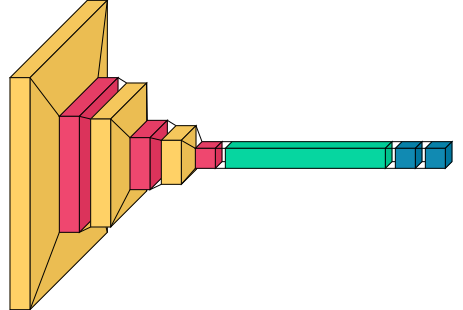

In [123]:
# Layered view of the model
visualkeras.layered_view(model)

In [124]:
# Predicting the data by randomly selecting the image from the folders 
IMG_SIZE = 120
test_image = "/content/drive/MyDrive/Project/FoodData/Banana/271.jpg"
ia = cv2.imread(test_image)
ia = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))
    

In [125]:
# Reshaping the image according to the model built
predict = np.array(ia).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
predict = predict.astype('float32')
predict /= 255

In [126]:
# Predicting the output of the image
np.argmax(model.predict(predict.reshape(-1, 120, 120, 3)))

1

Observation: The model correctly predicts the output of the above test image belongs to class 'Banana' which has key index value '1'

In [132]:
IMG_SIZE = 120
test_image = "/content/drive/MyDrive/Project/FoodData/Apple/103.jpg"
ia = cv2.imread(test_image)
ia = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))

In [133]:
predict = np.array(ia).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
predict = predict.astype('float32')
predict /= 255

In [134]:
np.argmax(model.predict(predict.reshape(-1, 120, 120, 3)))

0

Observation: The model correctly predicts the output of the above test image belongs to class 'Apple' which has key index value '0'

In [135]:
IMG_SIZE = 120
test_image = "/content/drive/MyDrive/Project/FoodData/Pineapple/400.jpg"
ia = cv2.imread(test_image)
ia = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))
predict = np.array(ia).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
predict = predict.astype('float32')
predict /= 255
np.argmax(model.predict(predict.reshape(-1, 120, 120, 3)))

4

Observation: The model correctly predicts the output of the above test image belongs to class 'Pineapple' which has key index value '4'

In [136]:
#Saving the model 
model.save("/content/drive/MyDrive/Project/food_model.h5")

Text(0.5, 0, 'Training Steps')

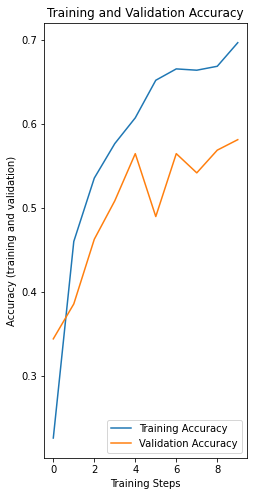

In [137]:
# Using history callback, plotting the accuracy & loss of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Defining the plot parameters for accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

Observation: As we can see that the accuracy of training and validation increased with respect to training steps

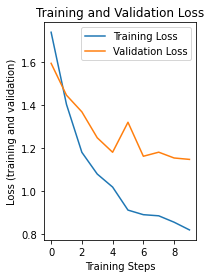

In [138]:
# defining the plot parameters for loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

Observation: As we can see that the loss of training and validation decreased with respect to training steps

Creating a basic interface using gradio 

In [139]:
pip install gradio

In [140]:
import gradio as gr

In [141]:
from keras.models import load_model

In [142]:
# Loading the saved model
model1=load_model('/content/drive/MyDrive/Project/food_model.h5')

In [143]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)        

In [144]:
# Labelling the food with calories 
labels = ['Apple - 95 cal','Banana - 105 cal','Cherry - 77 cal','Lemon - 17 cal','Pineapple - 452 cal','Tomato - 20 cal']
print(labels)

['Apple - 95 cal', 'Banana - 105 cal', 'Cherry - 77 cal', 'Lemon - 17 cal', 'Pineapple - 452 cal', 'Tomato - 20 cal']


In [145]:
# defining a function to classify the test images
from gc import set_debug
def classify_image(inp):
  inp = inp.reshape((-1, 120, 120, 3))
  prediction = model1.predict(inp).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(5)}
  print(confidences)
  return confidences

In [146]:
#gradio interface to check/test the classification of the images
gr.Interface(fn=classify_image, 
             inputs=gr.inputs.Image(shape=(120, 120)),
             outputs=gr.outputs.Label(num_top_classes=3)).launch(debug=False)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55319.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fe747605250>,
 'http://127.0.0.1:7865/',
 'https://55319.gradio.app')

Observation: We can see that the model correctly the food class 'Pineapple' when we uploaded a test image